# **Assignment 10**

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as LM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_iris, load_boston
from sklearn.metrics import accuracy_score

#plotly or other graphing library
import seaborn as sns

In [2]:
# Load datasets here once and assign to variables iris and boston

iris = load_iris()
boston = load_boston()

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
# Create a Pandas DataFrame with the feature data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a column for the target variable
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Get the target names
target_names = iris.target_names.tolist()

target_names

['setosa', 'versicolor', 'virginica']

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [5]:
X = iris.data
y = iris.target

knn = KNN(n_neighbors=5)

knn.fit(X, y)

new_observations = [
    [4.1, 2.5, 1.4, 0.2], 
    [6.5, 3.3, 4.7, 1.6], 
    [5.1, 3.2, 1.8, 0.6],
    [6.8, 2.4, 5.5, 0.7],
    [2.2, 4.4, 3.3, 1.1]
]

preds = knn.predict(new_observations)

# convert the encoded target values into target names
predicted_target_names = [target_names[p] for p in preds]

print(predicted_target_names)

['setosa', 'versicolor', 'setosa', 'virginica', 'setosa']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [6]:
new_X = iris.data
new_y = iris.target

X_train, X_test, y_train, y_test = tts(new_X, new_y, test_size=0.3, random_state=42, stratify=y)

new_knn = KNN(n_neighbors=5)

new_knn.fit(X_train, y_train)

y_pred = new_knn.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.9777777777777777


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

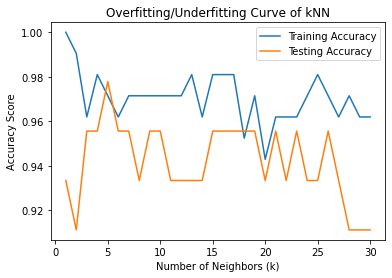

In [7]:
# create arrays to store training and testing accuracy scores for different k values
train_scores = []
test_scores = []

# create an array of k values from 1 to 30
k_values = np.arange(1, 31)

# iterate over different values of k
for k in range(1, 31):
    # create a kNN classifier object
    knn = KNN(n_neighbors=k)

    # fit the kNN model to the training data
    knn.fit(X_train, y_train)

    # calculate the training accuracy score of the model
    train_score = knn.score(X_train, y_train)

    # calculate the testing accuracy score of the model
    test_score = knn.score(X_test, y_test)

    # append the training and testing accuracy scores to the arrays
    train_scores.append(train_score)
    test_scores.append(test_score)

# plot the training and testing accuracy scores as a function of k
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Overfitting/Underfitting Curve of kNN')
plt.legend()
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [8]:
# Create a Pandas DataFrame with the feature data
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# Extract target values into a DataFrame
target_df = pd.DataFrame(boston.target, columns=['MEDV'])

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Calculate average of AGE and target
avg_age = boston_df['AGE'].mean()
avg_target = target_df['MEDV'].median()

# Convert target values to NumPy array
target_values = target_df['MEDV'].values

print(target_values.shape)

print('average age:',avg_age)

print('avg target:', avg_target)

print(type(target_values))

(506,)
average age: 68.57490118577078
avg target: 21.2
<class 'numpy.ndarray'>


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

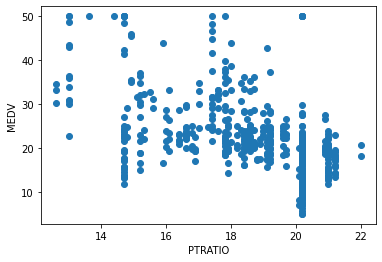

In [10]:
PTRATIO = boston.data[:, boston.feature_names.tolist().index('PTRATIO')]

plt.scatter(PTRATIO, target_values)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

In [11]:
# Reshape the PTRATIO array
PTRATIO = PTRATIO.reshape(-1, 1)

model = LM.LinearRegression()
model.fit(PTRATIO, target_values)

# Use np.linspace() to generate prediction X values from min to max PTRATIO
X_pred = np.linspace(np.min(PTRATIO), np.max(PTRATIO)).reshape(-1, 1)

y_pred = model.predict(X_pred)

print("Regression Prediction Space: ", X_pred.flatten())
print("Regression Predicted Values: ", y_pred.flatten())

Regression Prediction Space:  [12.6        12.79183673 12.98367347 13.1755102  13.36734694 13.55918367
 13.75102041 13.94285714 14.13469388 14.32653061 14.51836735 14.71020408
 14.90204082 15.09387755 15.28571429 15.47755102 15.66938776 15.86122449
 16.05306122 16.24489796 16.43673469 16.62857143 16.82040816 17.0122449
 17.20408163 17.39591837 17.5877551  17.77959184 17.97142857 18.16326531
 18.35510204 18.54693878 18.73877551 18.93061224 19.12244898 19.31428571
 19.50612245 19.69795918 19.88979592 20.08163265 20.27346939 20.46530612
 20.65714286 20.84897959 21.04081633 21.23265306 21.4244898  21.61632653
 21.80816327 22.        ]
Regression Predicted Values:  [35.16421874 34.75039328 34.33656781 33.92274235 33.50891688 33.09509142
 32.68126595 32.26744049 31.85361502 31.43978956 31.02596409 30.61213863
 30.19831316 29.7844877  29.37066224 28.95683677 28.54301131 28.12918584
 27.71536038 27.30153491 26.88770945 26.47388398 26.06005852 25.64623305
 25.23240759 24.81858212 24.40475666 23

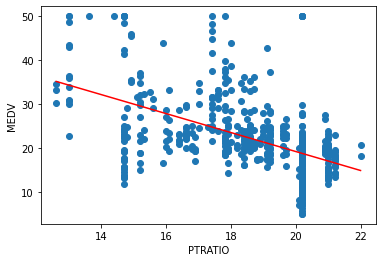

In [12]:
plt.scatter(PTRATIO, target_values)
plt.plot(X_pred, y_pred, color='red')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()
